In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [2]:
# read the data
data=pd.read_csv('housing.csv')
data.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [3]:
# data missing the columns' name, definitions as belowed
#ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS: proportion of non-retail business acres per town
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX: nitric oxides concentration (parts per 10 million)
#RM: average number of rooms per dwelling
#AGE: proportion of owner-occupied units built prior to 1940
#DIS: weighted distances to ﬁve Boston employment centers
#RAD: index of accessibility to radial highways
#TAX: full-value property-tax rate per $10,000
#PTRATIO: pupil-teacher ratio by town 
#B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
#LSTAT: % lower status of the population
#MEDV: Median value of owner-occupied homes in $1000s

cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv('housing.csv',header=None,delimiter=r"\s+",names=cols)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
#roughly idea of the dataframe
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


(506, 14)

In [6]:
# Data Cleaning ,check null values
data.isnull().values.any()

False

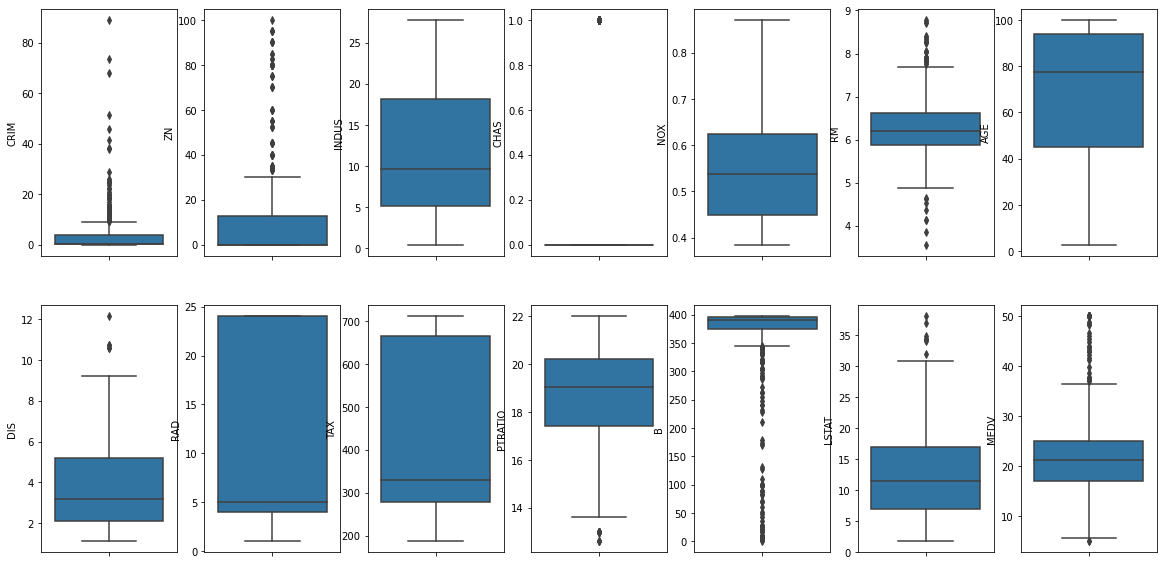

In [7]:
# features are too much, 13 features. model tunning
def outlier_check(data):
    fig, axs = plt.subplots(ncols=7, nrows=2, figsize=[20, 10])
    axs = axs.flatten()
    index = 0
    for a, b in data.items():
        sns.boxplot(y=a, data=data, ax=axs[index])
        index += 1
outlier_check(data)

In [8]:
# The Most of the columns have large number of outliers except RAD,TAX, NOX & AGE. 
# CRIM and B possess large amount of outliers than other features.
# From the data visualizing, CRIM, ZN,CHAS,RM,B,MEDV may consider to be removed from features

In [9]:
# Reducing Features-- using Random Forest Regressor
rf=RandomForestRegressor()
rf.fit(data.drop(['MEDV'],axis=1),data['MEDV'])

RandomForestRegressor()

In [10]:
#Predict X test result
Y_pred = rf.predict(data.drop(['MEDV'],axis=1))

In [11]:
from sklearn import metrics  
print('Mean Squared Error:', metrics.mean_squared_error(data['MEDV'], Y_pred))  

Mean Squared Error: 1.498403031620552


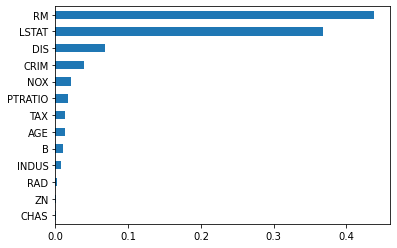

In [12]:
feat_importances= pd.Series(rf.feature_importances_,index=data.drop(['MEDV'],axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

In [32]:
#Removed the features: B,INDUS,RAD,CHAS,ZN and test the performance
updated_data=data.drop(['B','INDUS','RAD','CHAS','ZN','MEDV'],axis=1)
rf.fit(updated_data,data['MEDV'])
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   DIS      506 non-null    float64
 5   TAX      506 non-null    float64
 6   PTRATIO  506 non-null    float64
 7   LSTAT    506 non-null    float64
dtypes: float64(8)
memory usage: 31.8 KB


In [21]:
#Predict X test result and test the peroformance
Y_pred = rf.predict(updated_data)
print('Mean Squared Error:', metrics.mean_squared_error(data['MEDV'], Y_pred))  

R2 score:  <function r2_score at 0x7fe7cc0c80d0>
Mean Squared Error: 1.3944551264822118


In [15]:
# After removing B INDUS RAD CHAS ZN the MSE is better.

In [17]:
#split training and testing data, STD 0.2 and 0.8
X=updated_data
Y=data['MEDV']
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,train_size = 0.8)
print('Train Dataset : {} Test Dataset:{}'.format(X_train.shape, X_test.shape))

Train Dataset : (404, 8) Test Dataset:(102, 8)


In [19]:
# Modelling-- Linear Regression
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)
r2_score(Y_test,pred)

0.7239974531584918

In [35]:
lr.fit(X_train,Y_train)
lr_pred=lr.predict(X_test)
lr_acc=lr.score(X_test,Y_test)
print('The training accurancy for LR is ',lr.score(X_train,Y_train))
print('The testing accurancy for LR is ',lr_acc)

The training accurancy for LR is  0.7063560890573575
The testing accurancy for LR is  0.7239974531584918


In [22]:
# Modelling -- Decision Tree
model=DecisionTreeRegressor(max_depth=4)
model.fit(X_train, Y_train)
pred_test_y = model.predict(X_test)
print(r2_score(Y_test,pred_test_y))

0.7641851572511319


In [34]:
# Modelling -- Random Forest Regression
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)
RF_pred=RF.predict(X_test)
RF_score=RF.score(X_test,Y_test)
print('The training accurancy for RF is ',RF.score(X_train,Y_train))
print('The testing accurancy for RF is ',RF_score)

The training accurancy for RF is  0.9817416812787537
The testing accurancy for RF is  0.8945137522759069


In [ ]:
#The Random Forest Regression seems has highest accurancy for both Training and Testing dataset